# Sharpe Ratio and Portfolio Values

This post includes code and notes from [python for finance and trading algorithms udemy course](https://udemy.com/python-for-finance-and-trading-algorithms/) and [python for finance and trading algorithms udemy course notebooks](https://github.com/theoneandonlywoj/Python-for-Financial-Analysis-and-Algorithmic-Trading).

In [112]:
import pandas as pd
import pandas_datareader.data as web
import datetime

In [1]:
import quandl

## Create a Portfolio

In [114]:
df = pd.read_csv('https://stocks-snp-500.herokuapp.com/stocks/index_stocks_table.csv?_size=max')
df.head()

df['Date'] = pd.to_datetime(df.Date)
df.index = pd.to_datetime(df.Date)
df2 = df.drop('Date', axis=1)
df3 = df2.drop('rowid', axis=1)
df3 = df3.drop('Russell_2000_stock', axis=1)
df3 = df3.drop('SP500_stock', axis=1)
df3

stocks = df3

In [115]:
stocks

,FXAIX_stock,VRTTX_stock,FNCMX_stock,FSMAX_stock
Date,,,,
2018-01-02,94.230003,238.889999,91.989998,62.529999
2018-01-03,94.830002,240.289993,92.760002,62.740002
2018-01-04,95.230003,241.199997,92.930000,62.849998
2018-01-05,95.900002,242.750000,93.699997,63.090000
2018-01-08,96.059998,243.199997,93.970001,63.270000
...,...,...,...,...
2021-02-08,135.880005,355.709991,175.610001,93.940002
2021-02-09,135.750000,355.730011,175.839996,94.400002
2021-02-10,135.699997,355.579987,175.380005,94.309998


In [116]:
# stocks

# stocks['FXAIX_stock Daily Return'] = stocks['FXAIX_stock'].pct_change(1)

# cum_ret = 100 * (stocks['FXAIX_stock'][-1] / stocks['FXAIX_stock'][0] - 1 )
# print('Our return {} was percent!'.format(cum_ret))

# stocks['FXAIX_stock Daily Return'].mean()

# stocks['FXAIX_stock Daily Return'].std()

# stocks['FXAIX_stock Daily Return'].plot(kind = 'kde')

# portfolio_val=stocks

# SR = portfolio_val['FXAIX_stock Daily Return'].mean() / portfolio_val['FXAIX_stock Daily Return'].std()

# SR

# ASR = (252 ** 0.5) * SR

# ASR

# portfolio_val['FXAIX_stock Daily Return'].std()

# import matplotlib.pyplot as plt
# %matplotlib inline


# fig = plt.figure(figsize = (12, 8))
# portfolio_val['FXAIX_stock Daily Return'].plot(kind = 'kde')


In [117]:
start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('today')

FXAIX_stock = web.DataReader('FXAIX', 'yahoo', start, end)
FXAIX_stock.head()

VRTTX_stock = web.DataReader('VRTTX', 'yahoo', start, end)
VRTTX_stock.head()


FNCMX_stock = web.DataReader('FNCMX', 'yahoo', start, end)
FNCMX_stock.head()

FSMAX_stock = web.DataReader('FSMAX', 'yahoo', start, end)
FSMAX_stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,65.269997,65.269997,65.269997,65.269997,0.0,65.192108
2020-01-03,65.129997,65.129997,65.129997,65.129997,0.0,65.052277
2020-01-06,65.279999,65.279999,65.279999,65.279999,0.0,65.202103
2020-01-07,65.180000,65.180000,65.180000,65.180000,0.0,65.102219
2020-01-08,65.410004,65.410004,65.410004,65.410004,0.0,65.331947


In [118]:
VRTTX_stock

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,285.730011,285.730011,285.730011,285.730011,0.0,280.905823
2020-01-03,283.959991,283.959991,283.959991,283.959991,0.0,279.165680
2020-01-06,284.910004,284.910004,284.910004,284.910004,0.0,280.099640
2020-01-07,284.200012,284.200012,284.200012,284.200012,0.0,279.401642
2020-01-08,285.559998,285.559998,285.559998,285.559998,0.0,280.738678
...,...,...,...,...,...,...
2021-02-08,355.709991,355.709991,355.709991,355.709991,0.0,355.709991
2021-02-09,355.730011,355.730011,355.730011,355.730011,0.0,355.730011
2021-02-10,355.579987,355.579987,355.579987,355.579987,0.0,355.579987


In [119]:
FNCMX_stock

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,114.180000,114.180000,114.180000,114.180000,0.0,113.419273
2020-01-03,113.269997,113.269997,113.269997,113.269997,0.0,112.515327
2020-01-06,113.849998,113.849998,113.849998,113.849998,0.0,113.091469
2020-01-07,113.839996,113.839996,113.839996,113.839996,0.0,113.081535
2020-01-08,114.650002,114.650002,114.650002,114.650002,0.0,113.886139
...,...,...,...,...,...,...
2021-02-08,175.610001,175.610001,175.610001,175.610001,0.0,175.610001
2021-02-09,175.839996,175.839996,175.839996,175.839996,0.0,175.839996
2021-02-10,175.380005,175.380005,175.380005,175.380005,0.0,175.380005


In [120]:
for stock_df in (FXAIX_stock, VRTTX_stock, FNCMX_stock, FSMAX_stock):
    stock_df['Normed Return'] = stock_df['Adj Close'] / stock_df.iloc[0]['Adj Close']

In [121]:
stock_df

,High,Low,Open,Close,Volume,Adj Close,Normed Return
Date,,,,,,,
2020-01-02,65.269997,65.269997,65.269997,65.269997,0.0,65.192108,1.000000
2020-01-03,65.129997,65.129997,65.129997,65.129997,0.0,65.052277,0.997855
2020-01-06,65.279999,65.279999,65.279999,65.279999,0.0,65.202103,1.000153
2020-01-07,65.180000,65.180000,65.180000,65.180000,0.0,65.102219,0.998621
2020-01-08,65.410004,65.410004,65.410004,65.410004,0.0,65.331947,1.002145
...,...,...,...,...,...,...,...
2021-02-08,93.940002,93.940002,93.940002,93.940002,0.0,93.940002,1.440972
2021-02-09,94.400002,94.400002,94.400002,94.400002,0.0,94.400002,1.448028
2021-02-10,94.309998,94.309998,94.309998,94.309998,0.0,94.309998,1.446647


In [122]:
## Allocations


for stock_df,allo in zip([FXAIX_stock, VRTTX_stock, FNCMX_stock, FSMAX_stock],[.7, .1, .1, .1]):
    stock_df['Allocation'] = stock_df['Normed Return'] * allo



In [123]:
stock_df

,High,Low,Open,Close,Volume,Adj Close,Normed Return,Allocation
Date,,,,,,,,
2020-01-02,65.269997,65.269997,65.269997,65.269997,0.0,65.192108,1.000000,0.100000
2020-01-03,65.129997,65.129997,65.129997,65.129997,0.0,65.052277,0.997855,0.099786
2020-01-06,65.279999,65.279999,65.279999,65.279999,0.0,65.202103,1.000153,0.100015
2020-01-07,65.180000,65.180000,65.180000,65.180000,0.0,65.102219,0.998621,0.099862
2020-01-08,65.410004,65.410004,65.410004,65.410004,0.0,65.331947,1.002145,0.100215
...,...,...,...,...,...,...,...,...
2021-02-08,93.940002,93.940002,93.940002,93.940002,0.0,93.940002,1.440972,0.144097
2021-02-09,94.400002,94.400002,94.400002,94.400002,0.0,94.400002,1.448028,0.144803
2021-02-10,94.309998,94.309998,94.309998,94.309998,0.0,94.309998,1.446647,0.144665


In [124]:
## Investment


for stock_df in [FXAIX_stock, VRTTX_stock, FNCMX_stock, FSMAX_stock]:
    stock_df['Position Values'] = stock_df['Allocation'] * 100000

In [125]:
stock_df

,High,Low,Open,Close,Volume,Adj Close,Normed Return,Allocation,Position Values
Date,,,,,,,,,
2020-01-02,65.269997,65.269997,65.269997,65.269997,0.0,65.192108,1.000000,0.100000,10000.000000
2020-01-03,65.129997,65.129997,65.129997,65.129997,0.0,65.052277,0.997855,0.099786,9978.550848
2020-01-06,65.279999,65.279999,65.279999,65.279999,0.0,65.202103,1.000153,0.100015,10001.533085
2020-01-07,65.180000,65.180000,65.180000,65.180000,0.0,65.102219,0.998621,0.099862,9986.211594
2020-01-08,65.410004,65.410004,65.410004,65.410004,0.0,65.331947,1.002145,0.100215,10021.450322
...,...,...,...,...,...,...,...,...,...
2021-02-08,93.940002,93.940002,93.940002,93.940002,0.0,93.940002,1.440972,0.144097,14409.719995
2021-02-09,94.400002,94.400002,94.400002,94.400002,0.0,94.400002,1.448028,0.144803,14480.280543
2021-02-10,94.309998,94.309998,94.309998,94.309998,0.0,94.309998,1.446647,0.144665,14466.474582


,FXAIX_stock Pos,VRTTX_stock Pos,FNCMX_stock Pos,FSMAX_stock Pos,Total Pos
Date,,,,,
2021-02-08,85012.841550,12662.962553,15483.259184,14409.719995,127568.783283
2021-02-09,84931.504458,12663.675231,15503.537547,14480.280543,127578.997779
2021-02-10,84900.220227,12658.334494,15462.980820,14466.474582,127488.010123
2021-02-11,85062.894411,12688.950302,15526.462202,14540.103641,127818.410556
2021-02-12,85463.307752,12750.537170,15604.049511,14610.664189,128428.558622


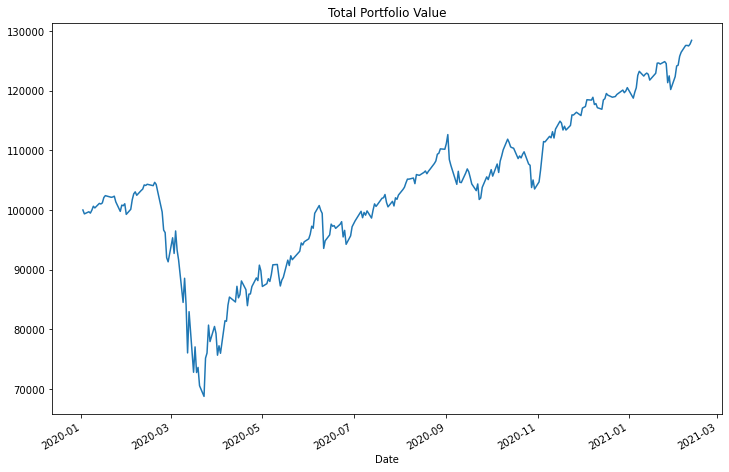

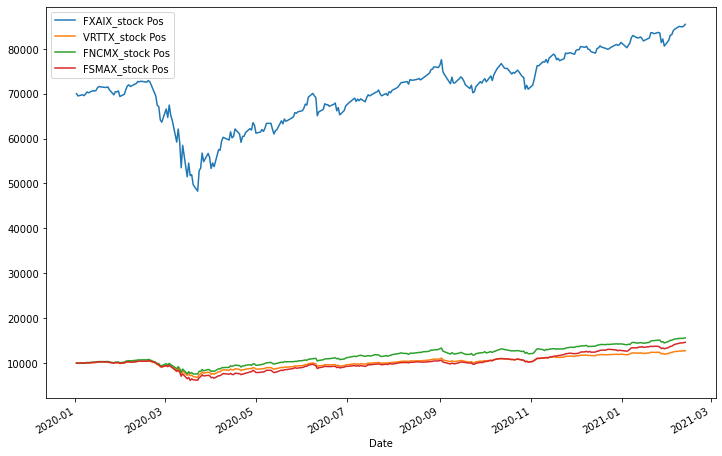

In [126]:


## Total Portfolio Value

portfolio_val = pd.concat([FXAIX_stock['Position Values'],
                           VRTTX_stock['Position Values'],
                           FNCMX_stock['Position Values'],
                           FSMAX_stock['Position Values']],
                          axis = 1)

portfolio_val.head()

portfolio_val.columns = ['FXAIX_stock Pos', 'VRTTX_stock Pos', 'FNCMX_stock Pos', 'FSMAX_stock Pos']

portfolio_val.head()

portfolio_val['Total Pos'] = portfolio_val.sum(axis = 1)

portfolio_val.head()

import matplotlib.pyplot as plt
%matplotlib inline

portfolio_val['Total Pos'].plot(figsize = (12, 8))
plt.title('Total Portfolio Value')

portfolio_val.drop('Total Pos',
                   axis = 1).plot(kind = 'line', figsize = (12, 8))

portfolio_val.tail()

In [127]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [128]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1] / portfolio_val['Total Pos'][0] - 1 )
print('Our return {} was percent!'.format(cum_ret))

Our return 28.428558621835933 was percent!


In [129]:
portfolio_val['Daily Return'].mean()

0.001112432148531155

In [130]:
portfolio_val['Daily Return'].std()

0.020973776003181118

<AxesSubplot:ylabel='Density'>

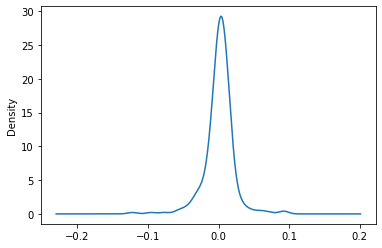

In [131]:
portfolio_val['Daily Return'].plot(kind = 'kde')

In [132]:
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

SR

ASR = (252 ** 0.5) * SR

ASR

portfolio_val['Daily Return'].std()

portfolio_val['Daily Return'].mean()

0.001112432148531155

<AxesSubplot:ylabel='Density'>

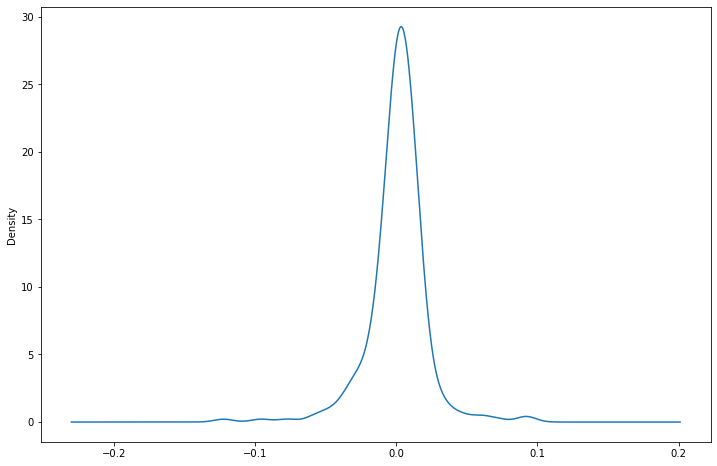

In [133]:
fig = plt.figure(figsize = (12, 8))
portfolio_val['Daily Return'].plot(kind = 'kde')

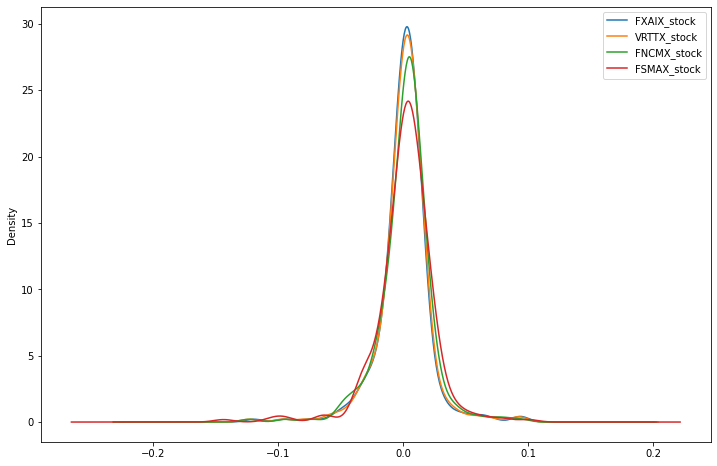

In [134]:
fig = plt.figure(figsize = (12, 8))
FXAIX_stock['Adj Close'].pct_change(1).plot(kind ='kde', label = 'FXAIX_stock')
VRTTX_stock['Adj Close'].pct_change(1).plot(kind ='kde', label = 'VRTTX_stock')
FNCMX_stock['Adj Close'].pct_change(1).plot(kind ='kde', label = 'FNCMX_stock')
FSMAX_stock['Adj Close'].pct_change(1).plot(kind ='kde', label = 'FSMAX_stock')
plt.legend()